# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Your code here :

# The whole thing here from https://plotly.com/python/plotly-express/#3d-coordinates

fig = px.scatter_3d(df_weather, x="MAX_TEMPERATURE_C", y="MIN_TEMPERATURE_C", z="SUNHOUR")

fig.show()

Is it hard to read the 3D scatterplot ?

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [ ]:
# Your code here :

# We need linear regressor (least squares)
from sklearn.linear_model import LinearRegression

# We need to split the data (EDIT: we actually don't.)
# from sklearn.model_selection import train_test_split

X = df_weather[["MIN_TEMPERATURE_C", "SUNHOUR"]]
y = df_weather["MAX_TEMPERATURE_C"]

# I think I don't need this testing set, because I can do model using entire set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=117)

model = LinearRegression().fit(X, y)

df_weather["predict"]=model.predict(X)

#df_weather["predict"]=model.predict(X_test)

df_weather[["MIN_TEMPERATURE_C", "SUNHOUR", "MAX_TEMPERATURE_C", "predict"]]




,MIN_TEMPERATURE_C,SUNHOUR,MAX_TEMPERATURE_C,predict
0,4,5.1,9,8.980922
1,5,8.7,8,12.353602
2,0,8.7,6,7.410233
3,-1,5.1,5,4.037552
4,-1,8.7,6,6.421559
...,...,...,...,...
360,10,8.7,13,17.296971
361,5,6.9,11,11.161599
362,2,8.7,9,9.387580
363,4,8.7,12,11.364928


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :

fig = px.scatter_3d(df_weather, x="predict", y="MIN_TEMPERATURE_C", z="SUNHOUR")

fig.show()


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

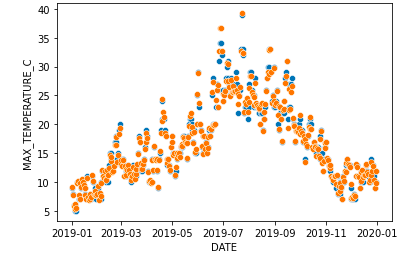

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

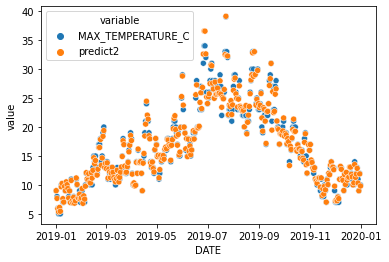

In [ ]:
# Your code here :

from sklearn.preprocessing import LabelEncoder

# Data preprocessing (encoding opinion)
# Encoding "OPINION":

le = LabelEncoder()
df_weather["E_OPINION"] = le.fit_transform(df_weather["OPINION"])

# Selection of columns into train set features
# Filtering out:
#   * "DATE" (is date)
#   * "MAX_TEMPERATURE_C" (is label)
#   * "OPINION" was encoded into "E_OPINION"
#   * "predict" is last model prediction
X = df_weather.loc[:, ~df_weather.columns.isin(["DATE", "MAX_TEMPERATURE_C", "OPINION", "predict"])]

# Selection of label
y = df_weather["MAX_TEMPERATURE_C"]

# Training model2 using least squares linear regression on all of the remaining features
model2 = LinearRegression().fit(X, y)

# Calculation of new model2 prediction
df_weather["predict2"] = model2.predict(X)

# Melting for Seaborn:
df_melted = df_weather[["DATE", "MAX_TEMPERATURE_C", "predict2"]].melt(id_vars=["DATE"], value_vars=["MAX_TEMPERATURE_C", "predict2"])

# Scatterplot powered by Seaborn
sns.scatterplot(x="DATE", y="value", hue="variable", data=df_melted)





You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :

[print(f"Coefficient of {X.columns.values[i]} = {model2.coef_[i]} (highest)") for i in range(len(model2.coef_)) if model2.coef_[i]==model2.coef_.max()]


Coefficient of HEATINDEX_MAX_C = 0.41177278266273193 (highest)


[None]